Example of the process of doing DEMs for all orbits for a given observation of an AR – where we don't window out any intervals because of shifts, etc. Instead, we will save energy-specific information about the percent of NuSTAR emission in the chosen region as a function of time, for later inspection. This will help identify cases where pointing shifts might cause unphysical distortion to the DEM inputs. 

Note: auto-download of an AIA file (for use in the initial co-alignmnet) will break while the JSOC is still down. We will add a thing where you can point to an existing AIA file instead.

Overview:

- Define orbits
- Run time interval selection
- Examine resulting intervals
- Manually establish a co-alignment shift between NuSTAR and AIA
- Automatically find co-alignment shifts + make regions for all other time intervals (note: this relies on the assumption that the COM is a good representation of the location of the brightest source, i.e. that the NuSTAR data is primarially one blob).
- Save AIA region files for NCCS input
- NOT IN THIS NOTEBOOK: YOU THEN TAKE THOSE AND MAKE AIA INPUTS ON THE NCCS
- Conduct AIA/NuSTAR DEMs as a function of time, given all the above
- Plot results.
- Print some stats about "left out" times.

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import glob
# from astropy.io import fits
# from astropy import units as u
# import importlib
# import pathlib

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import time_interval_selection as tis
import nustar_utilities as nuutil
import gauss2D as g2d
import all_nu_analysis as ana
import nustar_dem_prep as nu


# import os
# # For macOS
# def play_sound():
#     os.system("afplay /System/Library/Sounds/Glass.aiff")

import pickle
import pathlib
import importlib


In [2]:
key = '29-may-18_2'


In [3]:
with open('all_targets.pickle', 'rb') as f:
    data = pickle.load(f)

ARDict = data[key]

id_dirs = ARDict['datapaths']
obsids = ARDict['obsids']
working_dir = ARDict['working_dir']


In [4]:
ARDict

{'NOAA_ARID': ['AR12710', 'AR12711'],
 'datapaths': ['/Users/jmdunca2/nustar/may-2018/80410206001/'],
 'obsids': ['80410206001'],
 'working_dir': '/Users/jmdunca2/do-dem/initial_dem_29may18_2/',
 'loc': 'limb',
 'hale_class': ['alpha', 'beta'],
 'notes': 'faint disk AR + limb region. Potential two source. Disk region used to be an AR but was unnamed on day of observation.',
 'goes_satellite': 16,
 'orbit durations': [<Quantity 20.78333333 min>],
 'total duration': <Quantity 20.78333333 min>,
 'total livetime': <Quantity 2.95487966 min>}

In [5]:
for id in id_dirs:
    evt_data, hdr = nu.return_submap(datapath=id, fpm='A', return_evt_hdr=True)
    time0, time1 = [nuutil.convert_nustar_time(hdr['TSTART']), nuutil.convert_nustar_time(hdr['TSTOP'])]
    timerange = [time0, time1]
    print(timerange[0].strftime('%H-%M-%S'), timerange[1].strftime('%H-%M-%S'))

21-16-51 21-37-38


1007.36 arcsec 176.73 arcsec

1011.45 arcsec 119.251 arcsec

Percent of data in region 0:  0.6822040283288965
Percent of data in region 1:  0.0488974835501532
994.284 arcsec 170.599 arcsec

999.921 arcsec 113.314 arcsec

Percent of data in region 0:  0.6155663353494091
Percent of data in region 1:  0.07002855373707673



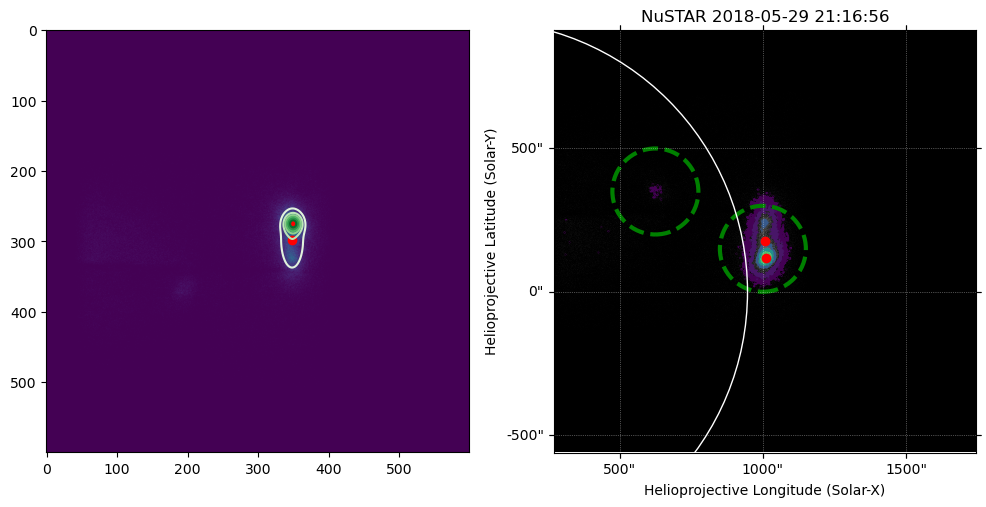

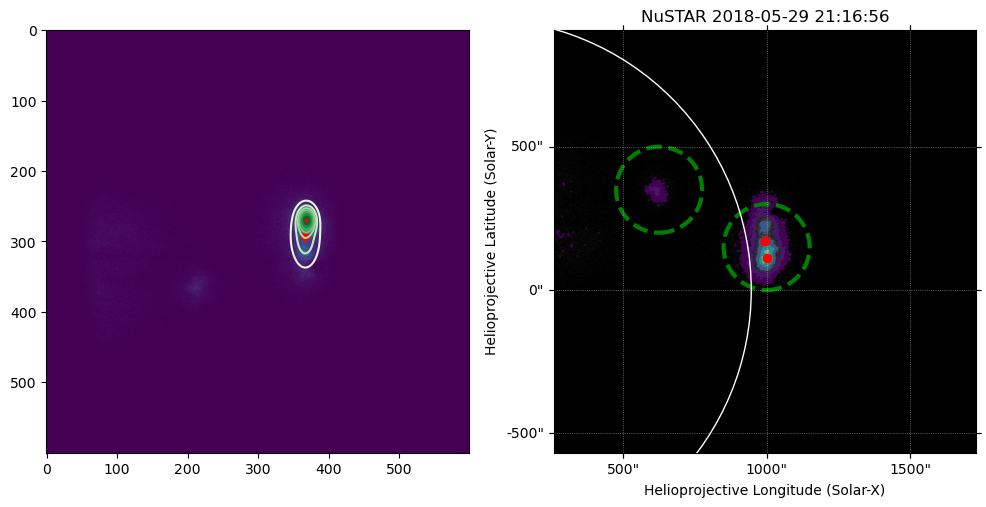

In [10]:
importlib.reload(ana)

# regions = [{'centerx': -1125,
#           'centery': -183,
#           'radius': 150},
#            {'centerx': -990,
#           'centery': -441,
#           'radius': 150}]


regions = [{'centerx': 1000, 'centery': 150, 'radius': 150},
           {'centerx': 625, 'centery': 350, 'radius': 150}
         ]

#NOT DONE YET!

ana.manual_prep(key, plot=True, #guess=[150,200], guess2=[250,250], 
                    make_scripts=True,
                      #plotgaussregions=True, 
                      plotregion=regions, write_input_regions=True)


In [6]:
import glob
import region_fitting as rf
obsid = obsids[1]
fpm='A'
regionfiles = glob.glob(working_dir+'gauss_cen_'+obsid+'_'+fpm+'_*.reg')
print(regionfiles)
offset, rad = rf.read_regfile(regionfiles[0], time0, time1, 'hourangle')
print(offset, rad)
offset, rad = rf.read_regfile(regionfiles[1], time0, time1, 'hourangle')
print(offset, rad)

['/Users/jmdunca2/do-dem/initial_dem_30jul21/gauss_cen_90710203001_A_1.reg', '/Users/jmdunca2/do-dem/initial_dem_30jul21/gauss_cen_90710203001_A_0.reg']
[ 480.04672326 -489.60914691] arcsec 150.0 arcsec
[ 603.46764504 -333.20997175] arcsec 150.0 arcsec


In [8]:
ARDict

{'NOAA_ARID': ['AR12847'],
 'datapaths': ['/Users/jmdunca2/nustar/jul-2021/90710201001/',
  '/Users/jmdunca2/nustar/jul-2021/90710203001/'],
 'obsids': ['90710201001', '90710203001'],
 'working_dir': '/Users/jmdunca2/do-dem/initial_dem_30jul21/',
 'notes': 'AR12847 was actually the name for the western part of this multi-part region of activity.                      By the time of the observation, the name was no longer in use.                      Two sources, but relatively close together and low-statistics.',
 'goes_satellite': 16,
 'orbit durations': [<Quantity 60.55 min>, <Quantity 60.53333333 min>],
 'total duration': <Quantity 121.08333333 min>,
 'total livetime': <Quantity 10.14773019 min>,
 'gauss_stats': [('EW', [175, 175], [225, 250], [4, 5]),
  ('EW', [175, 175], [225, 250], [4, 5])],
 'prepped_aia': '/Users/jmdunca2/do-dem/initial_dem_30jul21/all_aia_dicts_30-jul-21_1_post/'}

In [ ]:
# with open('all_targets.pickle', 'rb') as f:
#     data = pickle.load(f)

# ARDict = data[key]

# id_dirs = ARDict['datapaths']
# obsids = ARDict['obsids']
# working_dir = ARDict['working_dir']


In [ ]:
# importlib.reload(tis)
# all_targets=data
# index=0
# tis.one_orbit_tis_wrapper(key, all_targets, index, method='doublegauss', use_set_regionfiles=True)

Issue: even when the full-orbit double-gauss fitting does fine, and with a factor added to force a longer interval for the fainter of the two sources, the fitting often fails for sub intervals. In other words, it's possible that a statistically relevant number of counts can be accumulated from a source in a time period shorter than what is needed for that same source to be well-fit in the prescence of a brighter one. 

It is likely necessary to employ a new type of fixed-region method for cases with multiple sources. That's probably what we need for the even weirder sources too (manual entry). So let's see how they react to the double-gauss initial orbit-long fitting to see what all should be able to be incorporated into that model. 

In [ ]:
problem_kids = ['01-sep-15', #0 - elongated along limb. REGCOMPARE
                '02-sep-15', #1 - three-source (sometimes), elongated blur otherwise. REGCOMPARE
                '19-feb-16', #2 - single source, not enough counts > 6 keV
                '22-apr-16_1', #3 - single source, not enough counts > 6 keV
                '22-apr-16_2', #4 - single source in chip gap, does not appear in AIA94 (too high altitude?)
                '26-jul-16_1', #5 - Multiple limb sources. Farthest south dominates in orbits 1, 3, 4, but not really in 2. MANUAL REGIONS
                '11-sep-17', #6 - Blobby close-together 2-source. REGCOMPARE
                '12-sep-17', #7 - One source with very faint companion. MANUAL REGIONS
                '13-sep-17', #8 - One source with very faint companion. MANUAL REGIONS
                '10-oct-17', #9 - One source with very faint companion. MANUAL REGIONS
                '29-may-18_2', #10 - Two ARs, one does not appear in AIA94 (too high altitude?)
                '08-jan-21', #11 - Blob. REGCOMPARE
                '07-may-21' #12 - Single source; missing data for one of two orbits. 
               ]



In [ ]:


#reasonable regions clearly possible, need new preset-region method (doubles and others). 
manual_regions = ['01-sep-15',
                  '02-sep-15', #1 - three-source (sometimes), elongated blur otherwise.
                  '26-jul-16_1', #5 - Multiple limb sources. Farthest south dominates in orbits 1, 3, 4, but not really in 2. MANUAL REGIONS
                 ]

#regions where we have a plan
planned_process = [#'01-sep-15', #0 - elongated along limb. REGCOMPARE
                   '11-sep-17', #7 - Blobby close-together 2-source. REGCOMPARE
                    '12-sep-17', #8 - One source with very faint companion. MANUAL REGIONS
                    '13-sep-17', #9 - One source with very faint companion. MANUAL REGIONS
                    '10-oct-17',  #10 - One source with very faint companion. MANUAL REGIONS
                  #'08-jan-21', #14 - Blob. REGCOMPARE
                   '20-jul-21', #18 - Double source; MANUAL REGIONS
                    '30-jul-21_1' #19 - Double source; MANUAL REGIONS
                 ]

In [ ]:
importlib.reload(ana)

#key=manual_regions[0]
#print(key)


key='27-jul-16_1'

#September 12 2017
#regions = [{'centerx': 900, 'centery': -325, 'radius': 150},
#           {'centerx': 975, 'centery': -50, 'radius': 150}
#          ]

#September 13 2017
#regions = [{'centerx': 940, 'centery': -325, 'radius': 150},
#            {'centerx': 1015, 'centery': -50, 'radius': 150}
#           ]


#October 10 2017
#regions = [{'centerx': 950, 'centery': 330, 'radius': 150},
#            {'centerx': 1000, 'centery': 50, 'radius': 150}
#           ]

#September 1 2015
#regions = [{'centerx': 1000, 'centery': -275, 'radius': 150}
#          ]

#September 2 2015
#regions = [{'centerx': 1000, 'centery': -320, 'radius': 150},
#           {'centerx': 1050, 'centery': 25, 'radius': 150}
#          ]

#July 26 2016
regions = [{'centerx': 1000, 'centery': -220, 'radius': 150},
          {'centerx': 1000, 'centery': 200, 'radius': 150}
         ]

#NOT DONE YET!

ana.manual_prep(key, plot=True, #guess=[150,200], guess2=[250,250], 
                    make_scripts=True,
                      #plotgaussregions=True, 
                      plotregion=regions, write_input_regions=True)

#ana.single_gauss_prep(key, plot=True, make_scripts=False, 
#                      plotgaussregions=True)

In [ ]:
key='11-sep-17'
ana.single_gauss_prep(key, plot=True, make_scripts=False, 
                      plotgaussregions=True)

In [ ]:
data.keys()

In [ ]:
# import glob

# #Set path to obsid directory - initial pipeline should have been run already.
# ind=0
# datapath=id_dirs[ind]
# obsid=obsids[ind]

# evt_data, hdr = nu.return_submap(datapath=datapath, fpm='A', return_evt_hdr=True)
# time0, time1 = [nuutil.convert_nustar_time(hdr['TSTART']), nuutil.convert_nustar_time(hdr['TSTOP'])]
# timerange = [time0.tt.datetime, time1.tt.datetime]
# from datetime import timezone
# timerange = [t.replace(tzinfo=timezone.utc) for t in timerange]

# #Comment second line if you're not using this same example nustar orbit
# #Edit it to include only the desired time interval (default- all times in file) once you've run this once
# #timerange=[]
# #timerange=[datetime.datetime(2018, 5, 29, 22, 22), datetime.datetime(2018, 5, 29, 23, 20)]

# evtA = glob.glob(datapath+'/event_cl/*A06_cl.evt')
# evtB = glob.glob(datapath+'/event_cl/*B06_cl.evt')
# hkA  = glob.glob(datapath+'/hk/*A_fpm.hk')
# hkB  = glob.glob(datapath+'/hk/*B_fpm.hk')

# import lightcurves as lc

# importlib.reload(lc)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[2.,4.], 
#                               livetime_corr=False, save_dir=working_dir)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[4.,6.], 
#                               livetime_corr=False, save_dir=working_dir)
# lc.prepare_nustar_lightcurves(evtA, evtB, hkA, hkB, timebin=15, erange=[6.,10.], 
#                               livetime_corr=False, save_dir=working_dir)

# lc.plot_nustar_lightcurves(eranges = [[2.,4.],[4.,6.],[6.,10.]],
#                            timerange=timerange, save_dir=working_dir)